## Boston Housing Price Regression

### Menggunakan beberapa model lalu akan di compare 

#### Deskripsi column pada dataset

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per 10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in 1000

### Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

### Tampilkan dataset

In [3]:
df = load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

### feature_names

In [6]:
df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### data dan target/label

In [7]:
df.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
df.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
print(df.data.shape, df.target.shape)

(506, 13) (506,)


### Model building

1. RandomForestRegressor
2. LinearRegression
3. BayesianRidge
4. SGDRegressor

### Split data

In [11]:
from sklearn.model_selection import train_test_split
X, y = df.data, df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

### 1. RandomForestRegressor

In [65]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
print('prediksi X_test :', rfr.predict(X_test))
print('Score rfr :', rfr.score(X_test, y_test))
r2_score_rfr = r2_score(y_test, y_pred_rfr)
print('R2_score rfr :', r2_score_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
print('MAE rfr :', mae_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print('MSE rfr :', mse_rfr)

prediksi X_test : [13.585 15.646 14.511 17.774 28.17  32.819 23.938 20.788 30.978 19.98
  7.631 26.56  13.534 27.745 19.937 21.634 11.122 33.933 21.428 14.484
 47.29  10.415 40.13  21.603 20.291 20.608 14.708 21.05  19.438 47.127
 21.548 45.943 22.575 18.3   14.058 16.277 21.447 11.069 19.218 27.646
 17.449 23.857 20.596 19.334 14.292 22.804 11.301 17.335 11.068 26.635
 13.161 20.803 11.87  13.065 23.484 30.404 14.667 20.934 23.2   23.883
 23.829 21.604 15.902 20.518 43.506 26.372 34.283 19.456 17.408 26.728
 24.233 21.53  24.999 16.939 15.421 33.059 15.381 18.008 22.403 19.516
 28.494 21.505  7.711 15.231 20.18  14.533 14.592  9.515 23.582 14.699
 34.549 15.527 21.197 29.446 23.68  11.275 34.054 22.116 45.692 17.601
 45.182 11.175 24.666 18.624 21.962 16.957 29.458 19.414 16.243 35.236
 22.632 33.506 17.071 12.66  18.545  8.995 21.325 34.158 35.144 15.358
 12.735 34.385  8.805  9.12  25.246 20.121 20.096 24.039 28.987 18.385
 18.243 31.147 22.368 21.373 19.864 20.906 14.626  9.743 19.

In [66]:
import numpy as np

data = np.linspace(1,10,10000)
data_pred = [data[2], data[7], data[10], data[5], data[13],
            data[22], data[15], data[32], data[19], data[21],
            data[27], data[8], data[25]]
rfr.predict([data_pred])

array([40.22])

### 2. LinearRegression

In [69]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Prediki lr :', lr.predict(X_test))
print('Score lr ', lr.score(X_test, y_test))
r2_score_lr = r2_score(y_test, y_pred_lr)
print('R2_score ', r2_score_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('MAE lr ', mae_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print('MSE lr ', mse_lr)

Prediki lr : [ 9.07498942 14.64421539 13.24730352 17.71360951 27.62155214 32.5781355
 25.09957641 19.54392607 37.18353573 20.01953219  5.42055429 27.386764
 19.51713749 27.88073716 21.41347757 21.64699443 12.91809016 35.33695813
 20.15263635 13.52173633 39.44040005 12.56020944 24.54229268 23.51185152
 20.07177301 18.99412876 17.14711434 23.76229307 19.83979851 41.9574989
 24.0679471  36.52903733 25.14642455 17.14358683 14.37880663 16.48867013
 19.73549649 10.4686681  17.28294874 32.40666654 20.03600512 24.17824996
 24.03487295 17.33815827 14.01345351 24.06809522 13.56545444 22.99964493
 17.64900311 28.59846479 13.98397075 15.38696151  5.12289774 18.4186587
 24.66320427 26.26237982 14.32680624 22.48294672 23.10968109 22.27753347
 25.81775099 24.54285424 20.67255938 22.04454272 36.94895336 28.89224265
 32.63870163 19.34110487 16.45737537 25.64663658 27.93736645 22.11025462
 29.25307626 23.89417844 19.9072415  33.23608322 20.23146332 20.19486863
 22.83201331 15.20447953 32.82619177 21.385

In [68]:
data = np.linspace(1,10,10000)
data_pred_2 = [data[2], data[81], data[12], data[5], data[13],
            data[87], data[15], data[32], data[19], data[21],
            data[76], data[88], data[200]]
lr.predict([data_pred_2])

array([19.0692335])

### 3. BayesianRidge

In [71]:
br = BayesianRidge()
br.fit(X_train, y_train)
y_pred_br = br.predict(X_test)
print('Prediki br :', br.predict(X_test))
print('Score br ', br.score(X_test, y_test))
r2_score_br = r2_score(y_test, y_pred_br)
print('R2_score ', r2_score_br)
mae_br = mean_absolute_error(y_test, y_pred_br)
print('MAE br ', mae_br)
mse_br = mean_squared_error(y_test, y_pred_br)
print('MSE br ', mse_br)

Prediki br : [11.51058777 14.76219594 13.33376553 17.18299995 26.95714004 32.11712349
 25.37295724 19.9159962  36.08987973 20.30510125  5.21108953 26.46776722
 19.73536061 28.1550925  22.34981655 20.70728945 13.17923418 35.29825409
 21.14916837 13.66037436 38.70011601 13.48468658 24.1761059  22.55868016
 19.92732477 17.90949877 17.41213158 23.39600452 19.23995148 42.71611716
 23.62194077 35.67845457 25.30862962 17.12249825 16.96989616 14.5676264
 19.66409165  9.42488388 17.64254587 32.45855896 18.63711125 24.42777193
 22.7248593  16.82526321 14.14237874 23.35308775 13.98395735 24.75020415
 18.10495283 28.20841801 14.47268542 14.71766853  4.61127596 19.26847858
 24.50805999 26.94296394 14.16825748 23.52622428 24.94818118 23.04217516
 25.81136984 24.14693422 19.9976634  22.80070901 36.55795803 28.79333999
 32.46206449 19.59769466 15.9177821  28.57861045 27.4829443  21.2802595
 28.91250407 22.02733015 20.4610257  33.09830578 20.6909629  19.77367522
 23.86706417 15.04513173 32.63297718 21.

### 4. SGDRegressor

In [74]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print('Prediki sgd :', sgd.predict(X_test))
print('Score sgd ', sgd.score(X_test, y_test))
r2_score_sgd = r2_score(y_test, y_pred_sgd)
print('R2_score ', r2_score_sgd)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
print('MAE sgd ', mae_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print('MSE sgd ', mse_sgd)

Prediki sgd : [2.28041047e+14 2.47874314e+14 2.41574404e+14 2.45271392e+14
 2.53026553e+14 2.26855934e+14 2.41552948e+14 2.43314684e+14
 2.57429195e+14 2.42897655e+14 4.65014042e+13 2.39376801e+14
 2.63710605e+14 2.70256461e+14 2.38759175e+14 9.58312344e+13
 2.64037912e+14 2.75164648e+14 2.63093760e+14 2.50856121e+14
 2.39104542e+14 2.60368142e+14 2.43602481e+14 2.63426106e+14
 2.47526372e+14 2.43042498e+14 4.15024794e+13 2.45621851e+14
 2.48476734e+14 2.40572639e+14 2.42545592e+14 2.39049093e+14
 2.38849594e+14 2.39741744e+14 2.23520209e+14 2.41583751e+14
 2.50889334e+14 1.57789855e+14 2.39683477e+14 2.75551461e+14
 1.41408709e+14 2.51211362e+14 2.33510468e+14 2.38009497e+14
 4.99197440e+13 2.37770245e+14 2.63452287e+14 2.04843084e+14
 2.62434569e+14 2.48517596e+14 1.03804183e+14 2.66624641e+14
 2.66461279e+14 2.57414864e+14 2.45215430e+14 2.49559301e+14
 5.39862849e+13 2.38547651e+14 2.48933797e+14 2.49992888e+14
 2.45785311e+14 2.44225271e+14 2.63375872e+14 2.39457920e+14
 2.3223329

In [81]:
model = ['RandomForestRegressor','LinearRegression','BayesianRidge','SGDRegression']
r2 = [r2_score_rfr, r2_score_lr, r2_score_br, r2_score_sgd]
mae_plot = [mae_rfr, mae_lr, mae_br, mae_sgd]
mse_plot = [mse_rfr, mse_lr, mse_br, mse_sgd]

plot_model = pd.DataFrame({
    "model":model,
    "r2":r2,
    "mae":mae_plot,
    "mse":mse_plot
})
plot_model.sort_values(by='r2', ascending=False)

,model,r2,mae,mse
0,RandomForestRegressor,7.673735e-01,2.368224e+00,1.595120e+01
1,LinearRegression,6.076861e-01,3.453262e+00,2.690098e+01
2,BayesianRidge,5.979346e-01,3.500886e+00,2.756964e+01
3,SGDRegression,-8.213635e+26,2.312650e+14,5.632092e+28


## Plotting Model

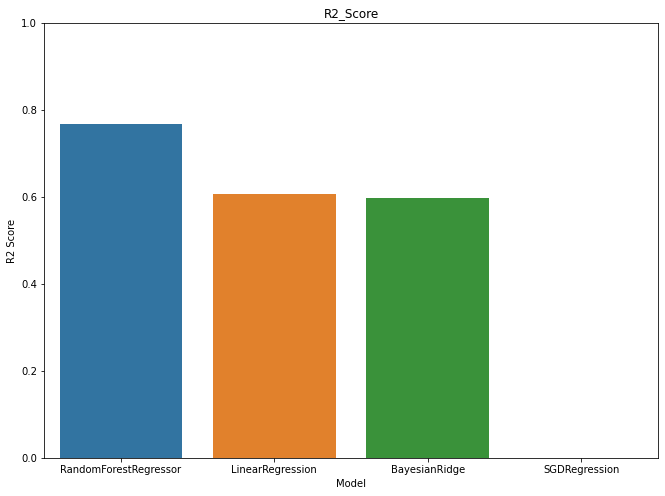

In [98]:
plt.figure(figsize=(11,8))
sns.barplot(model,r2)
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.title('R2_Score')
plt.ylim(0,1)
plt.show()

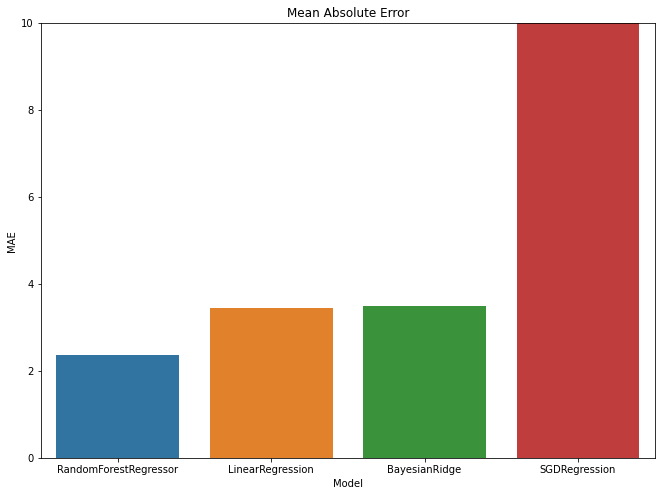

In [104]:
plt.figure(figsize=(11,8))
sns.barplot(model,mae_plot)
plt.ylabel('MAE')
plt.xlabel('Model')
plt.title('Mean Absolute Error')
plt.ylim(0,10)
plt.show()

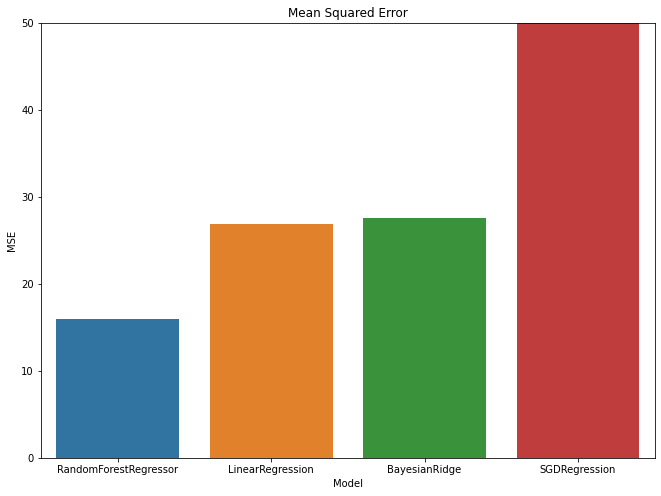

In [106]:
plt.figure(figsize=(11,8))
sns.barplot(model,mse_plot)
plt.ylabel('MSE')
plt.xlabel('Model')
plt.title('Mean Squared Error')
plt.ylim(0,50)
plt.show()